In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# reading csv file using pandas
google_ratings = pd.read_csv("google_review_ratings.csv")

In [3]:
google_ratings.dtypes

User            object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
Unnamed: 25    float64
dtype: object

In [4]:
# rename columns for easier understanding
google_ratings.columns
renamed = google_ratings.rename(columns = {"User": "user",
                                 "Category 1": "churches",
                                 "Category 2": "resorts",
                                 "Category 3": "beaches",
                                 "Category 4" : "parks",
                                 "Category 5": "theatres",
                                 "Category 6": "museums",
                                 "Category 7": "malls",
                                 "Category 8": "zoos",
                                 "Category 9": "restaurants",
                                 "Category 10": "pubs",
                                 "Category 11": "local",
                                 "Category 12": "burger_pizza",
                                 "Category 13": "hotels",
                                 "Category 14": "juice_bars",
                                 "Category 15": "art_galleries",
                                 "Category 16": "dance_clubs",
                                 "Category 17": "swimming_pools",
                                 "Category 18": "gyms",
                                 "Category 19": "bakeries",
                                 "Category 20": "beauty_spas",
                                 "Category 21": "cafes",
                                 "Category 22": "view_points",
                                 "Category 23": "monuments",
                                 "Category 24": "gardens",
                                 "Unnamed: 25": "misc"}) # misc for miscellaneous

# converting strings to lowercase
renamed['user'] = renamed['user'].str.lower()

# standardizing format of names
renamed.user = renamed.user.str.replace(' ', '_')

# convert object column to float
renamed['local'] = renamed['local'].str.replace('\t', '').astype(float)

In [8]:
# Check names are in correct format
renamed.head()

,user,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,misc
0,user_1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,user_2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,user_3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,user_4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,user_5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
# Check for corrected names and data types
renamed.dtypes

user               object
churches          float64
resorts           float64
beaches           float64
parks             float64
theatres          float64
museums           float64
malls             float64
zoos              float64
restaurants       float64
pubs              float64
local             float64
burger_pizza      float64
hotels            float64
juice_bars        float64
art_galleries     float64
dance_clubs       float64
swimming_pools    float64
gyms              float64
bakeries          float64
beauty_spas       float64
cafes             float64
view_points       float64
monuments         float64
gardens           float64
misc              float64
dtype: object

In [ ]:
# Check columns for missing values.
renamed.isna().sum().sort_values(ascending=False)

misc              5454
gardens              1
burger_pizza         1
juice_bars           0
monuments            0
view_points          0
cafes                0
beauty_spas          0
bakeries             0
gyms                 0
swimming_pools       0
dance_clubs          0
art_galleries        0
user                 0
churches             0
local                0
pubs                 0
restaurants          0
zoos                 0
malls                0
museums              0
theatres             0
parks                0
beaches              0
resorts              0
hotels               0
dtype: int64

In [ ]:
# Remove misc. column
removed = renamed.drop(['misc'], axis=1)
removed.head()

,user,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,user_1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,user_2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,user_3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,user_4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,user_5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Replace garden missing value using mean
garden_mean = removed['gardens'].mean()
removed['gardens'].fillna(value=garden_mean, inplace=True)

# Replace burger_pizza missing value using mean
burger_pizza_mean = removed['burger_pizza'].mean()
removed['burger_pizza'].fillna(value=burger_pizza_mean, inplace=True)

In [ ]:
# Check missing values have been replaced
removed.isna().sum().sort_values(ascending=False)

user              0
hotels            0
monuments         0
view_points       0
cafes             0
beauty_spas       0
bakeries          0
gyms              0
swimming_pools    0
dance_clubs       0
art_galleries     0
juice_bars        0
burger_pizza      0
churches          0
local             0
pubs              0
restaurants       0
zoos              0
malls             0
museums           0
theatres          0
parks             0
beaches           0
resorts           0
gardens           0
dtype: int64

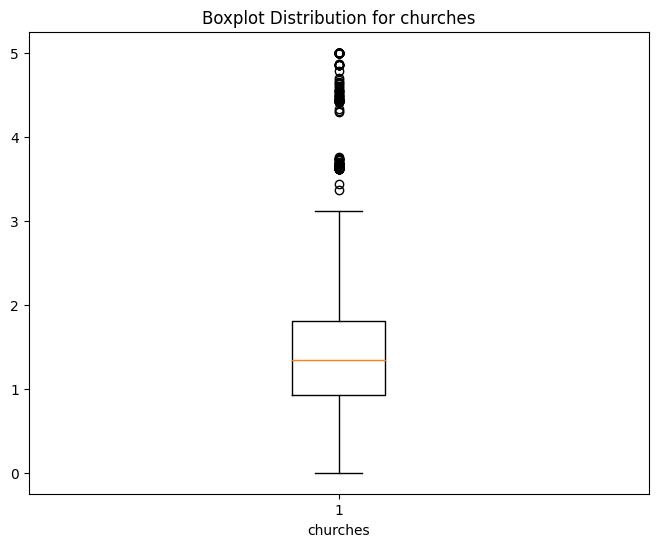

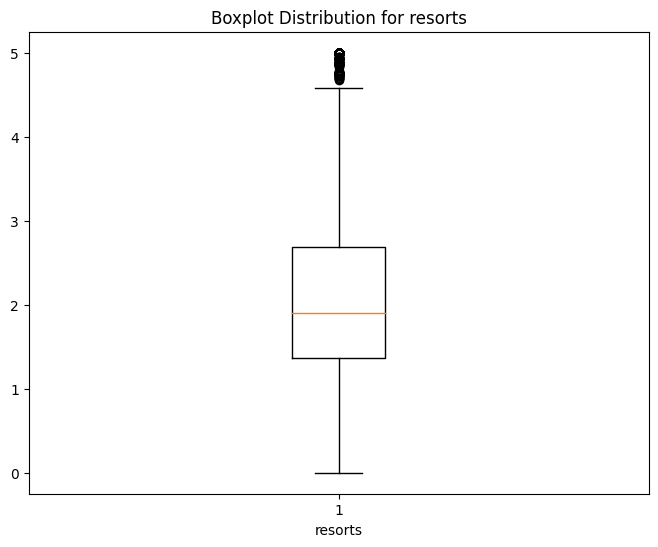

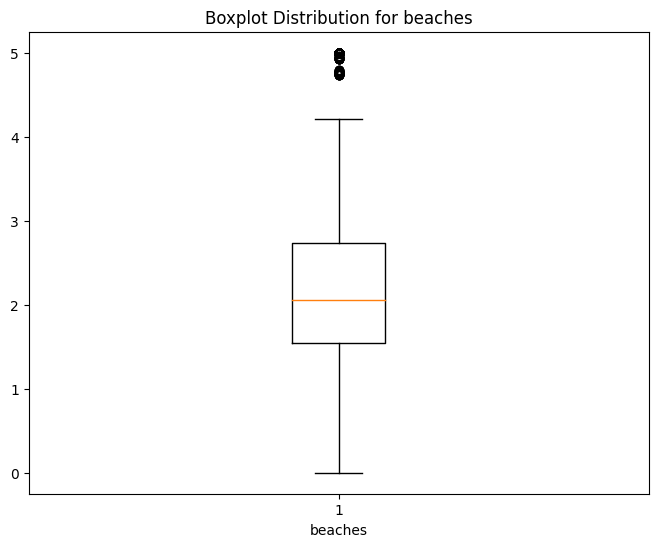

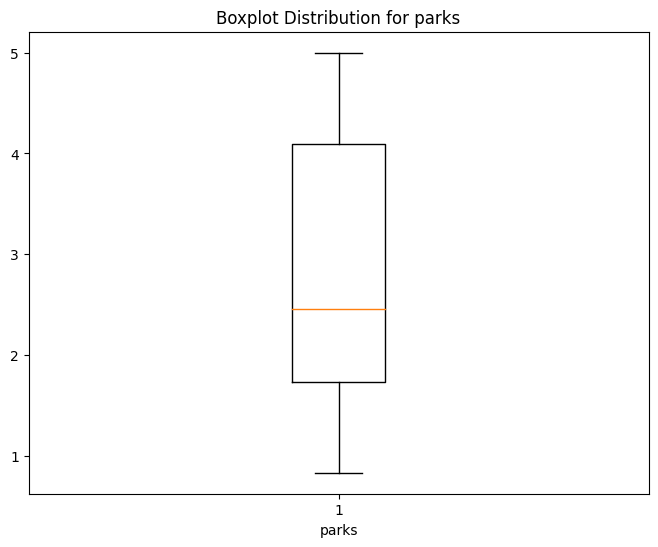

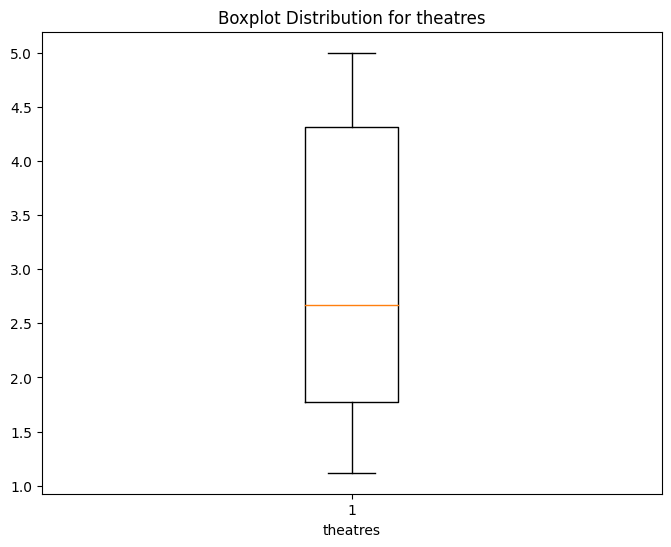

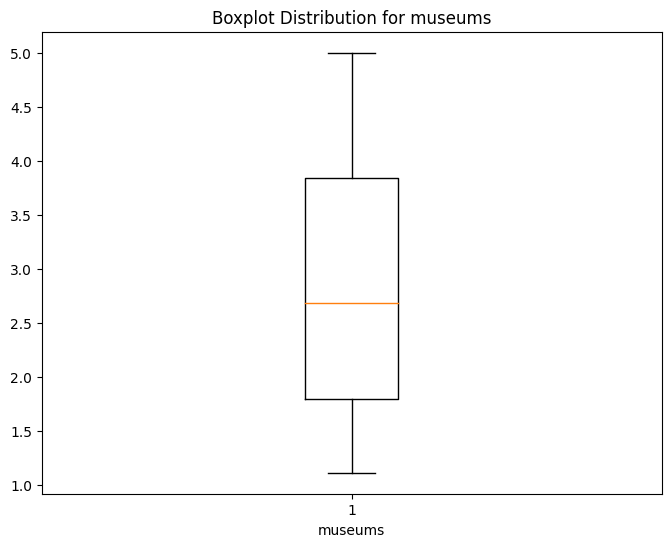

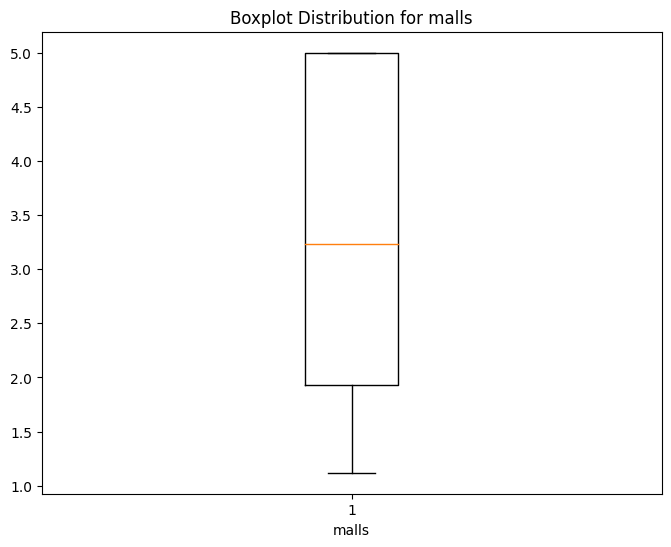

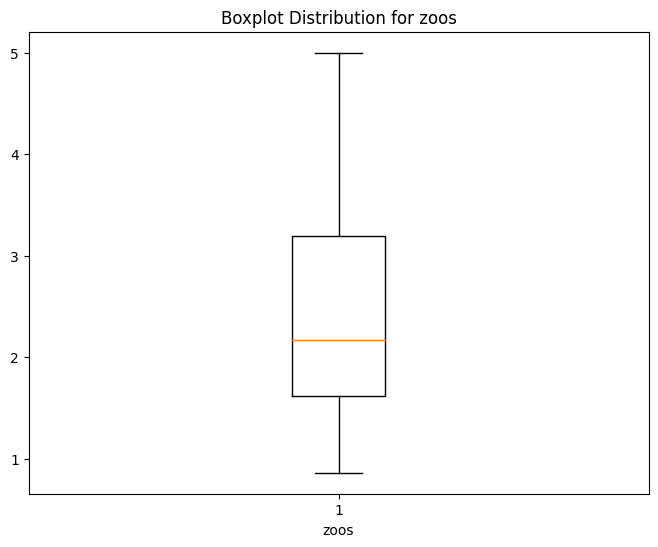

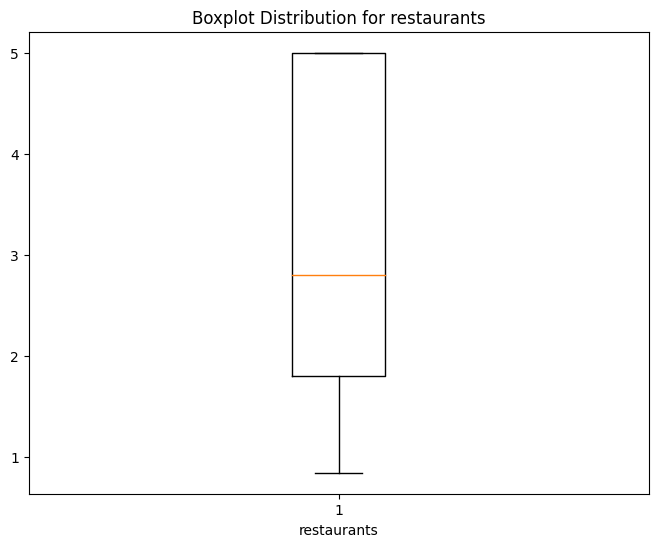

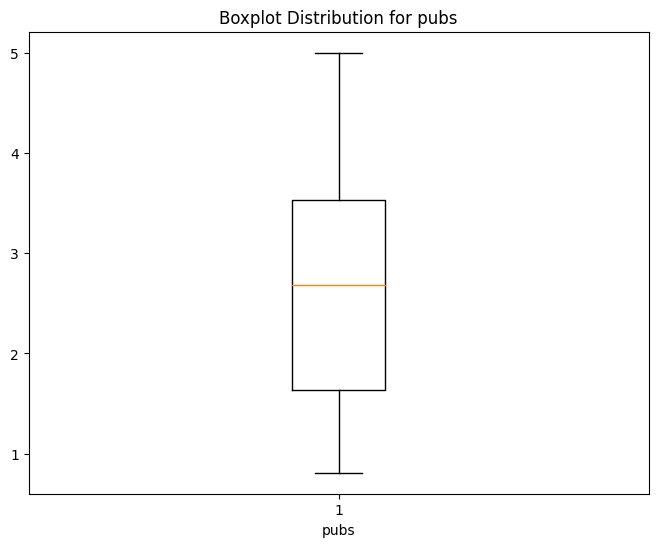

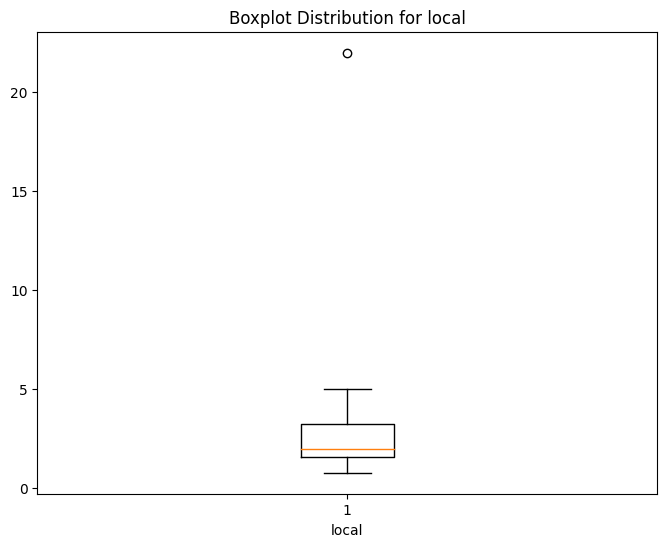

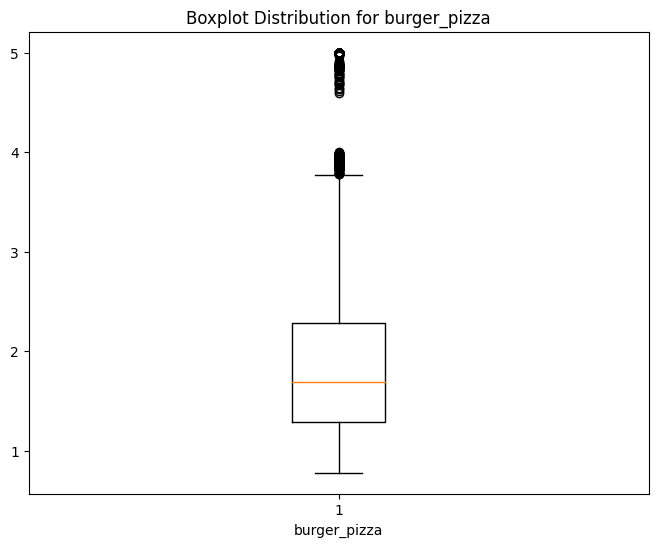

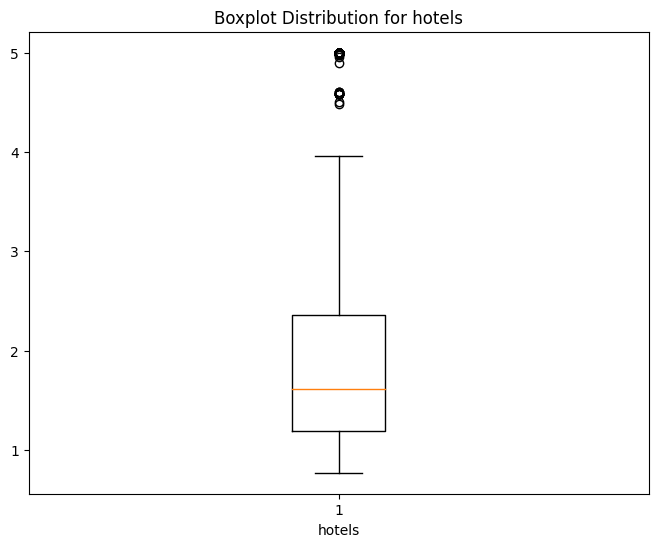

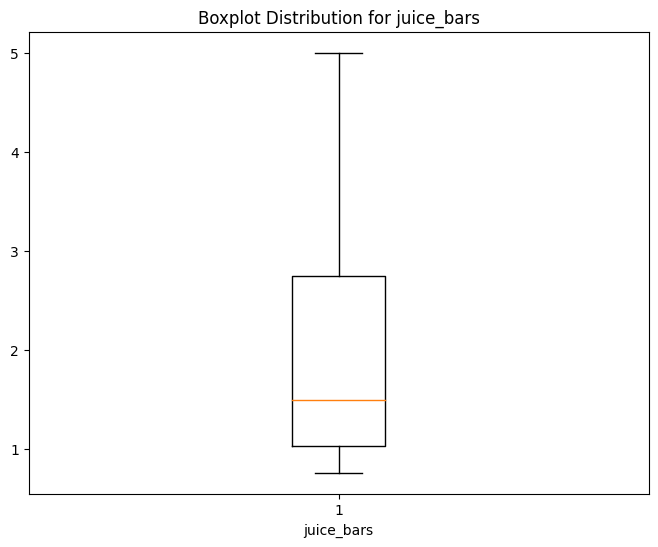

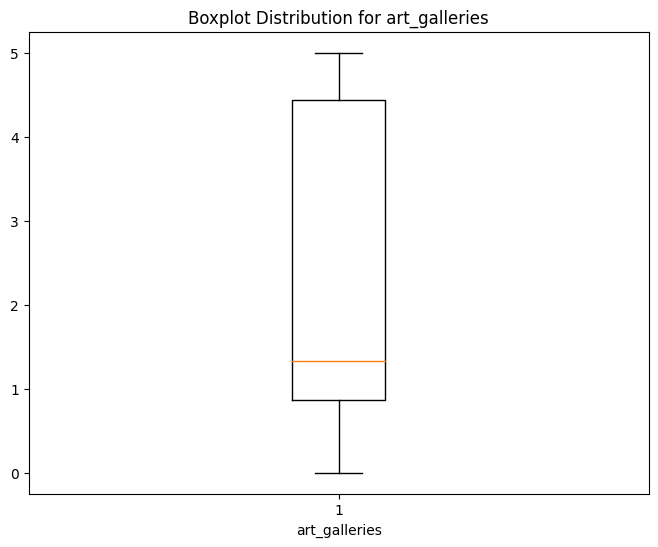

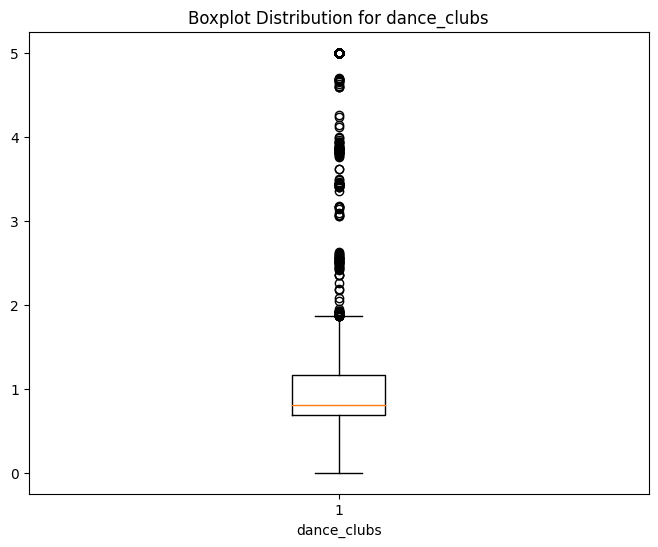

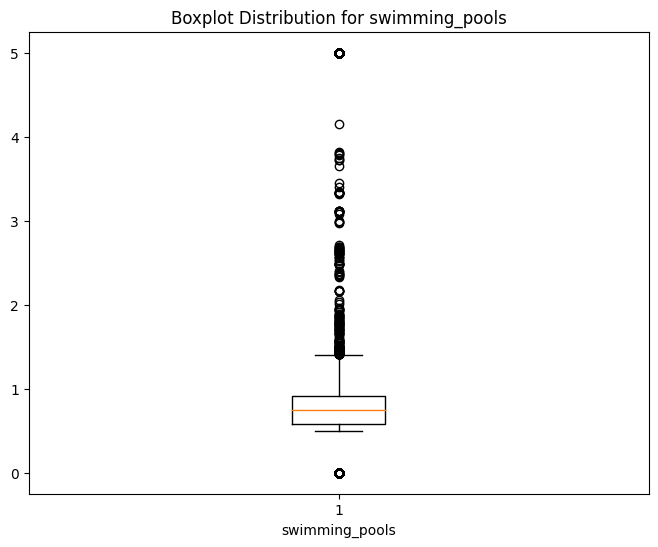

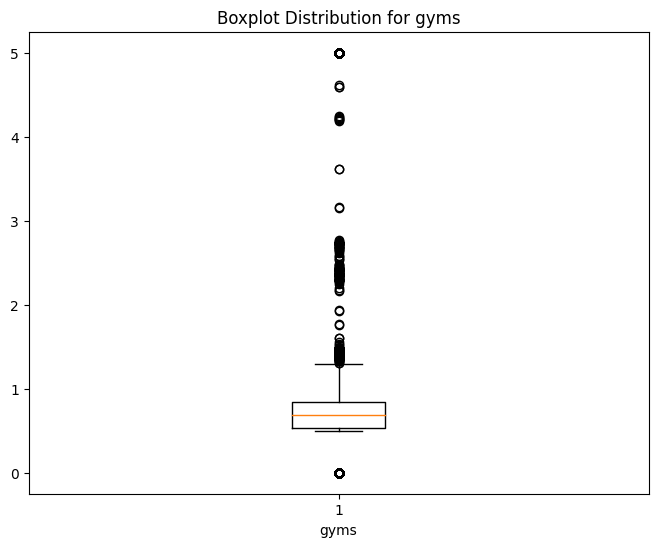

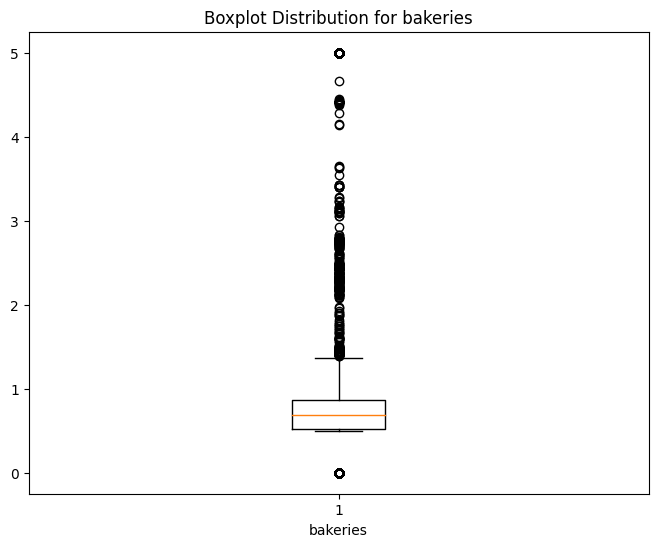

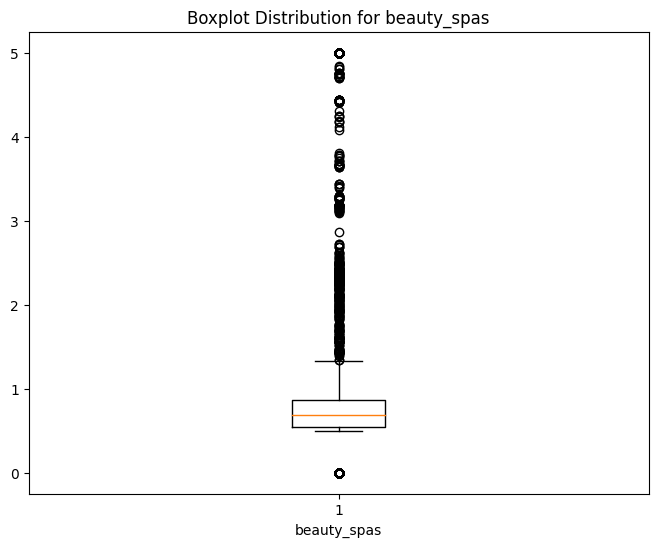

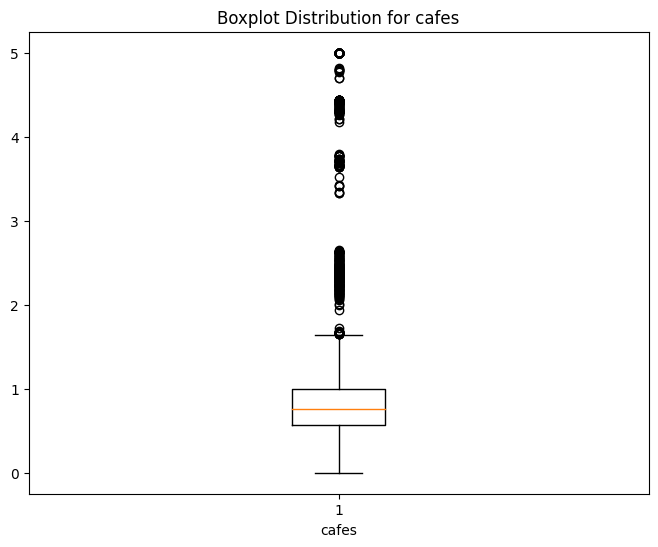

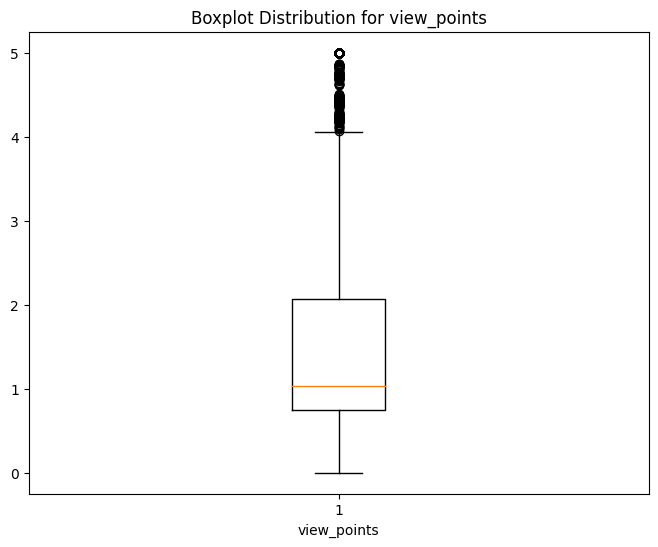

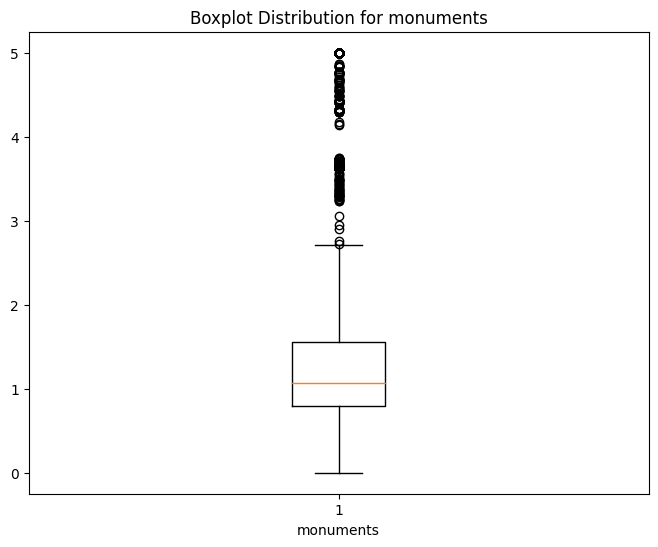

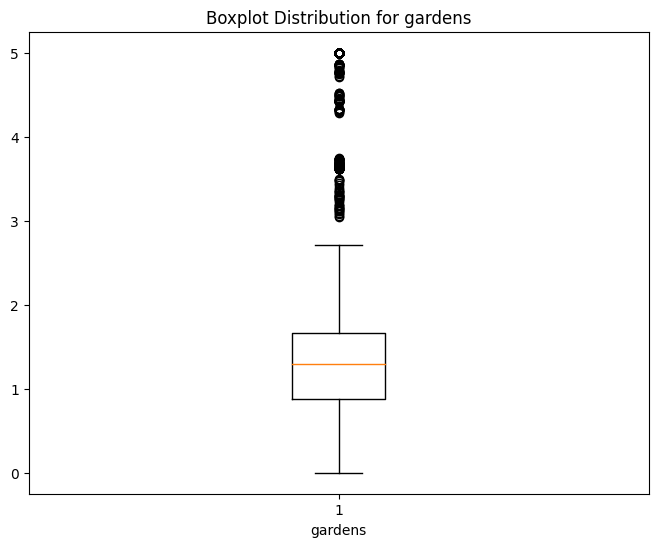

In [ ]:
# Review dataset for extreme outliers
numerical = removed.drop('user', axis=1)
# Create a box plot for each column
for column in numerical:
    plt.figure(figsize=(8, 6))
    plt.boxplot(numerical[column], vert=True)
    plt.title(f'Boxplot Distribution for {column}')
    plt.xlabel(f'{column}')
    plt.show()

In [ ]:
# Review local_services for extreme outliers using statistics

column = 'local'
q1 = numerical['local'].quantile(0.25) # upper quartile
q3 = numerical['local'].quantile(0.75) # lower quartile
iqr = q3 - q1 # calculates iqr for each column

# calculate for outliers using iqr
outliers = ((numerical['local'] < (q1 - 1.5 * iqr))) | (numerical['local'] > (q3 + 1.5 * iqr))
cleaned_reviews = numerical[~outliers]

In [ ]:
# Review datasets statisticss with clean data
cleaned_reviews.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,pubs,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,...,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000
mean,1.455674,2.319824,2.489520,2.797192,2.959278,2.893809,3.351778,2.541047,3.126301,2.833093,...,2.206060,1.192821,0.949175,0.822374,0.969072,0.999443,0.965098,1.749941,1.530818,1.560570
std,0.827673,1.421542,1.247852,1.309084,1.338948,1.282301,1.413338,1.111338,1.356767,1.307509,...,1.715701,1.107105,0.973623,0.947993,1.202844,1.193097,0.928332,1.598275,1.316172,1.171677
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.685000,2.740000,4.095000,4.315000,3.840000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**More Exploratory Analysis Based on Cleaned Dataset**

---



---






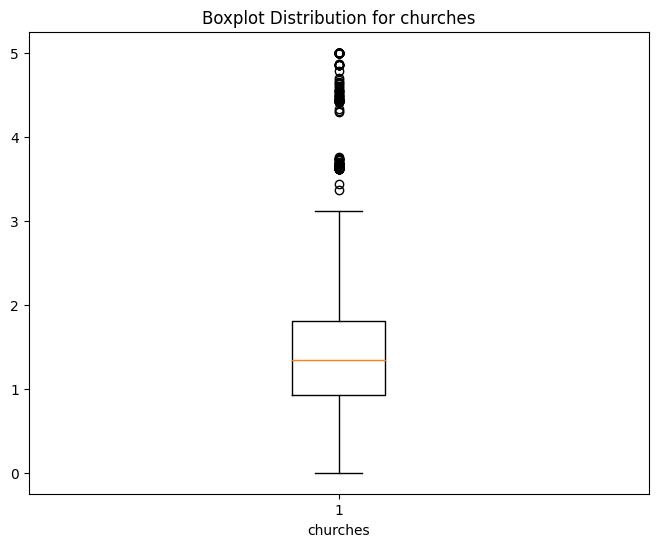

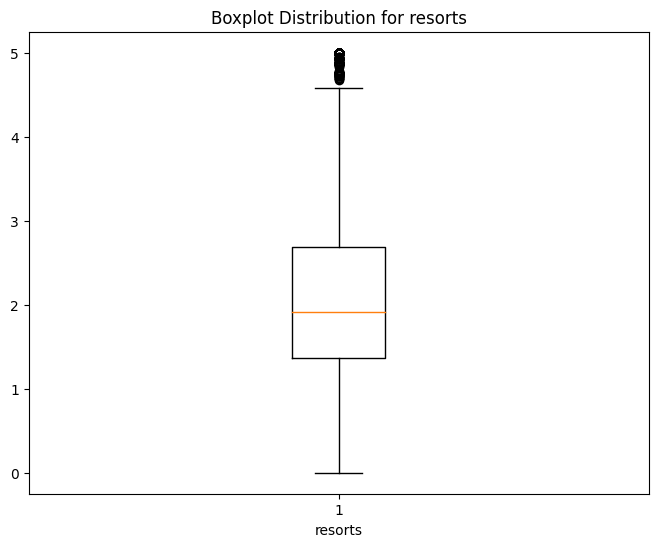

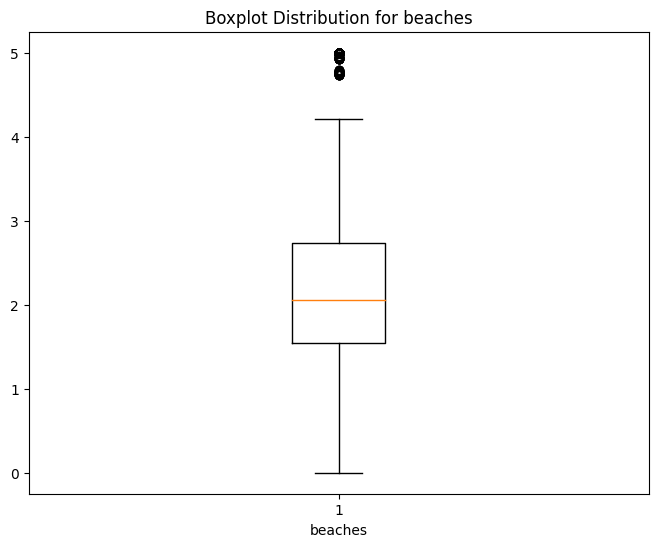

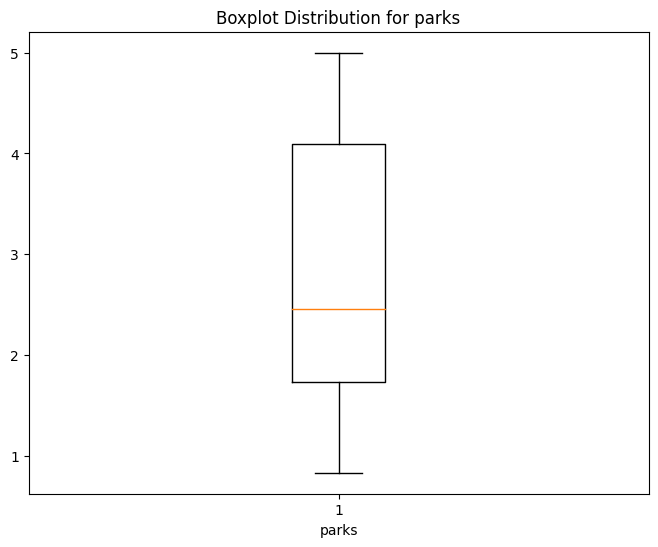

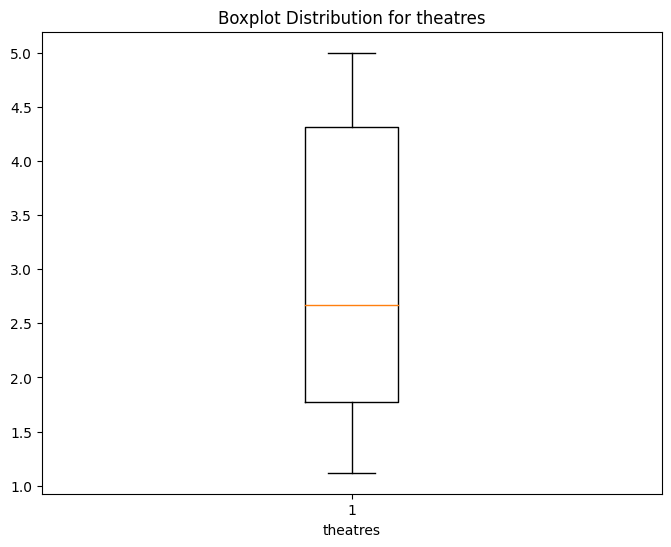

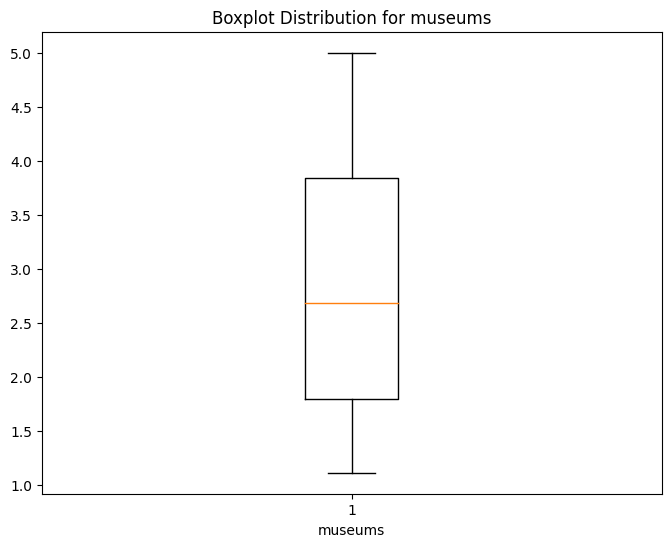

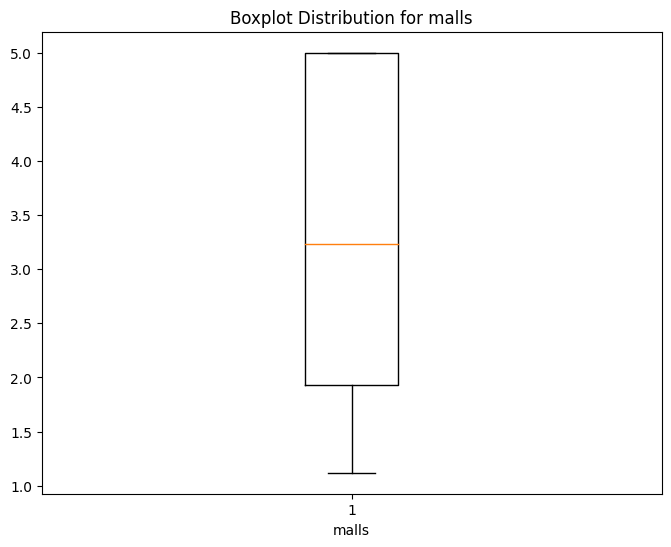

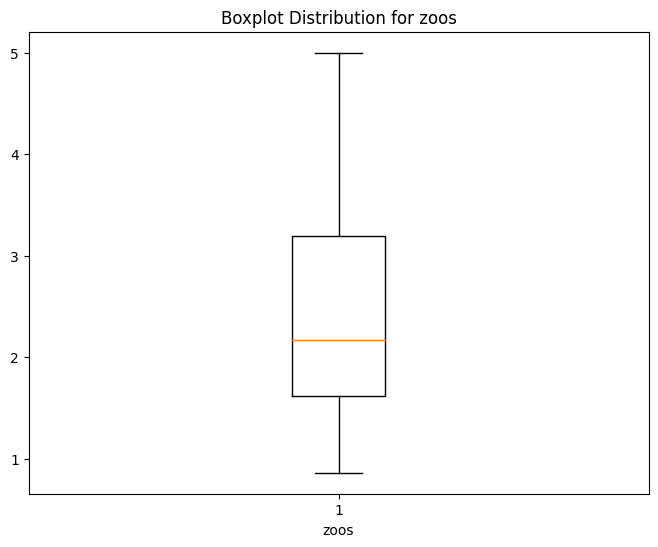

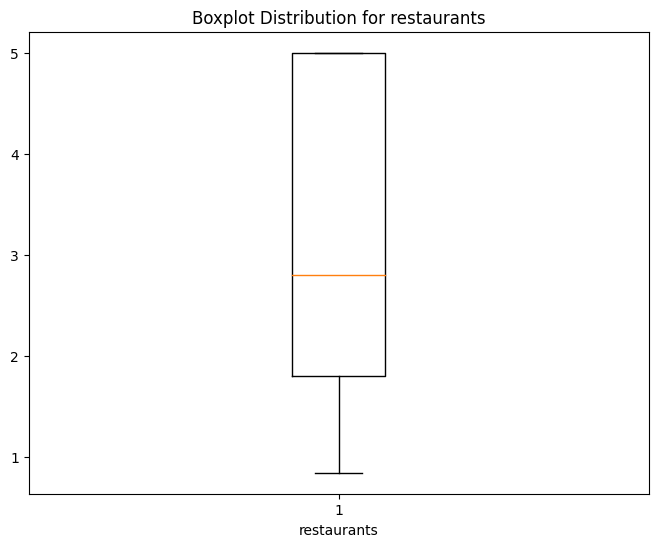

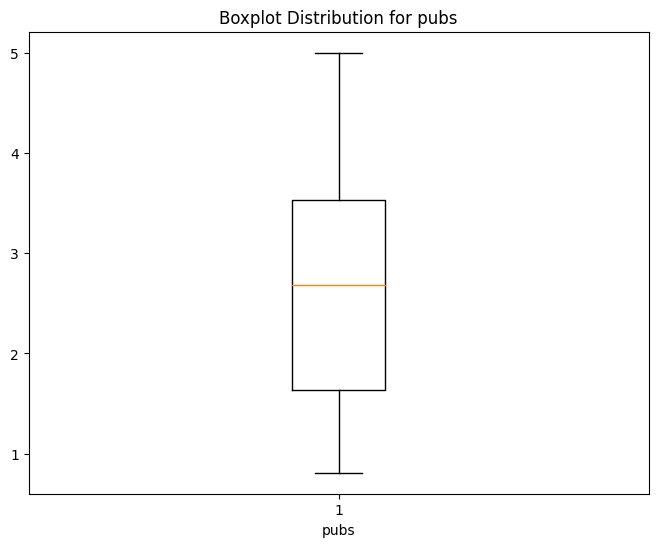

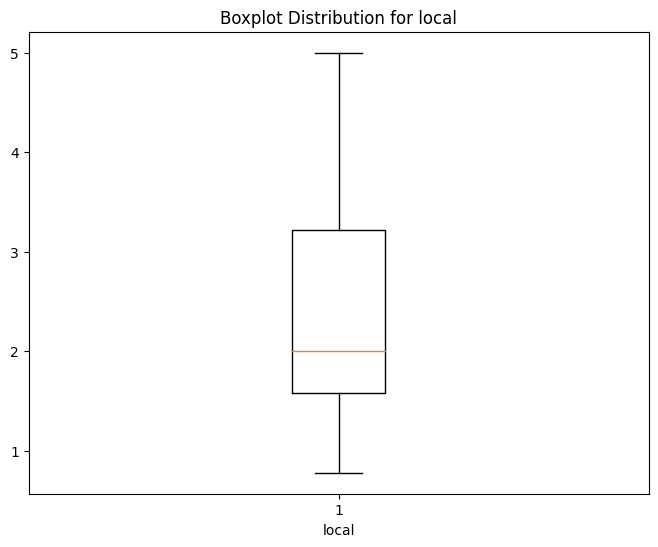

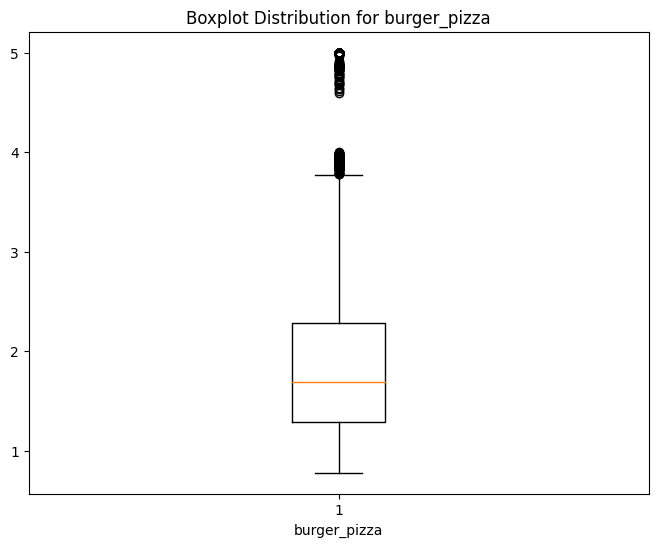

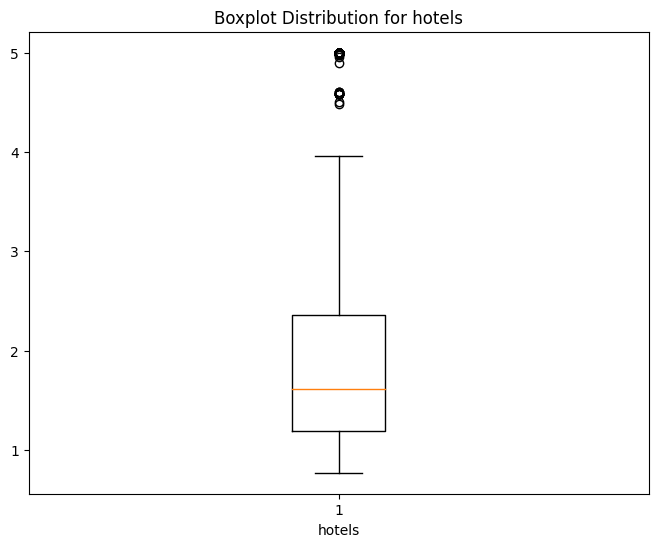

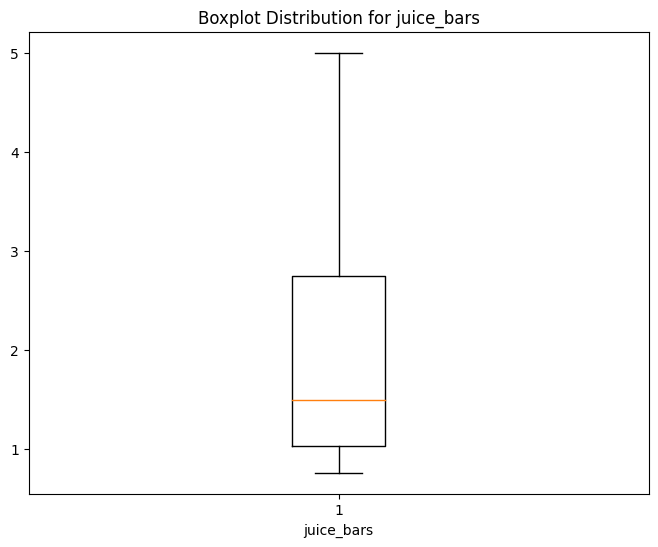

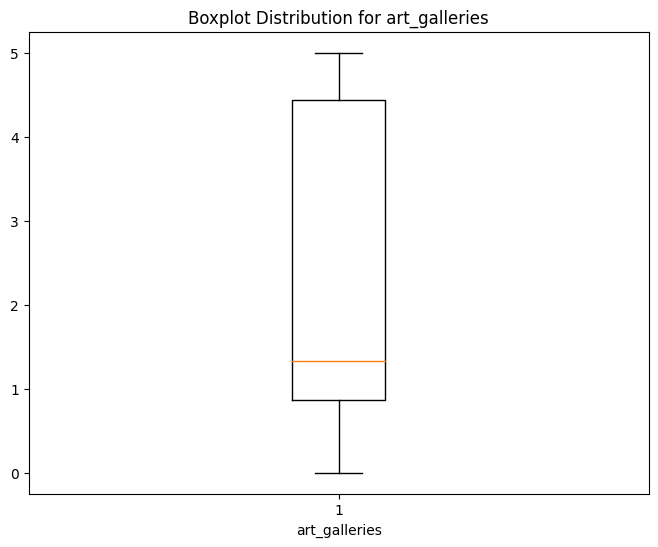

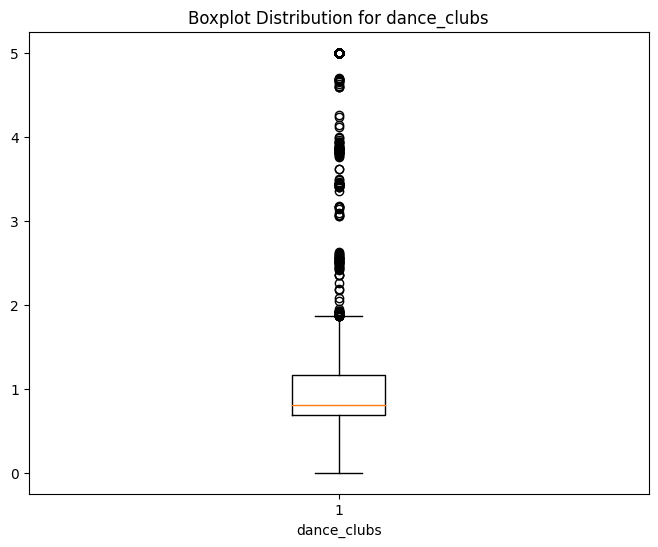

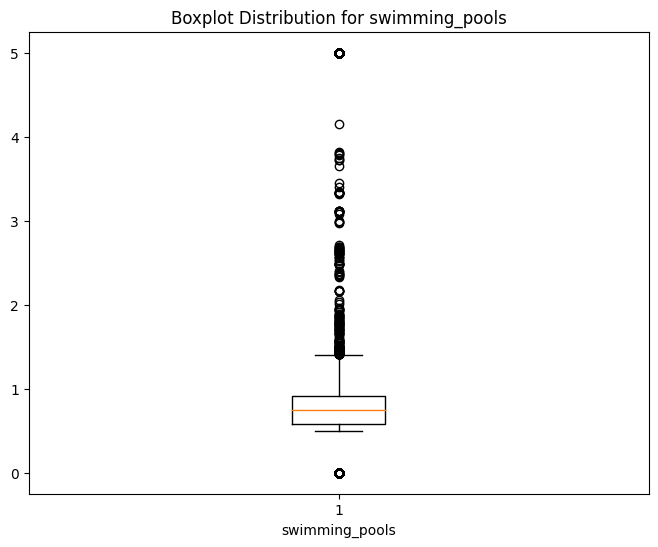

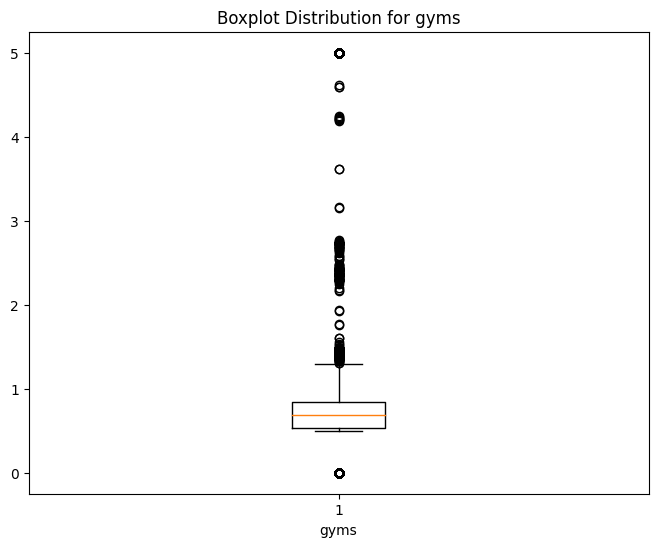

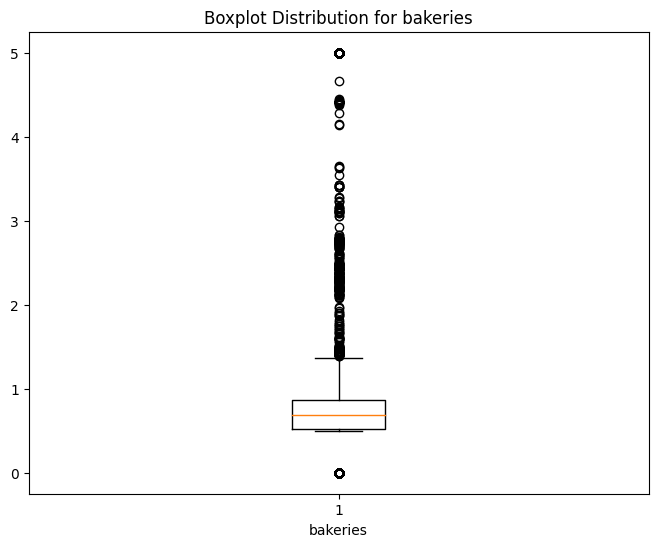

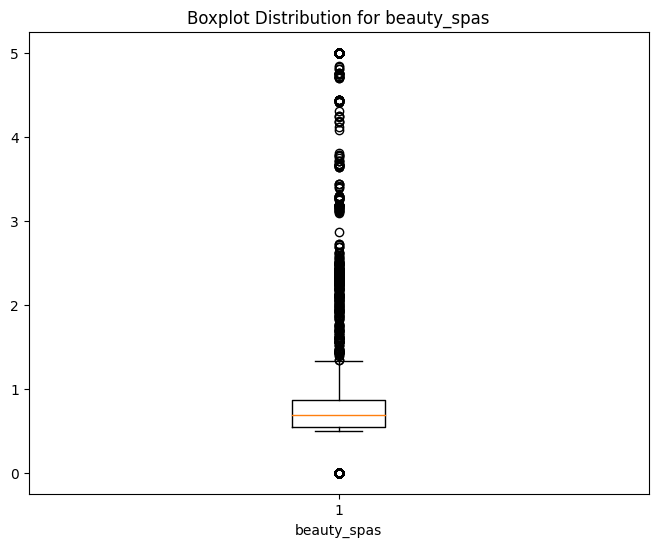

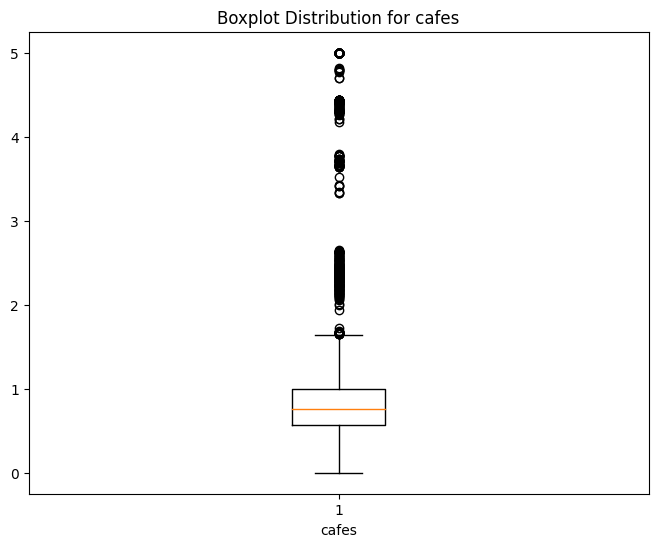

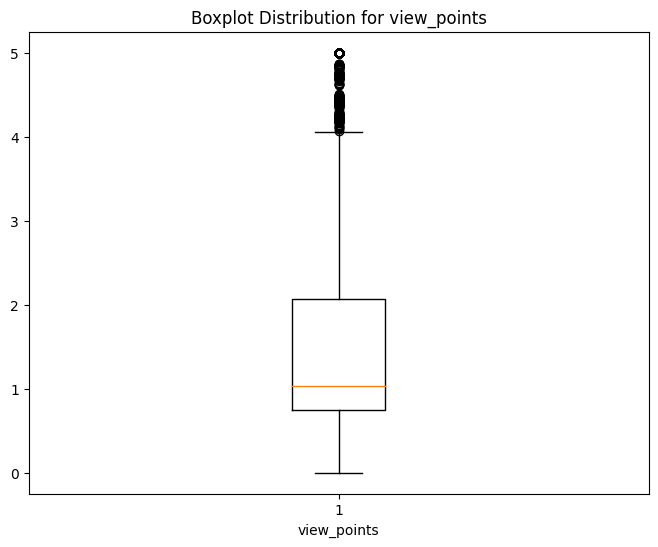

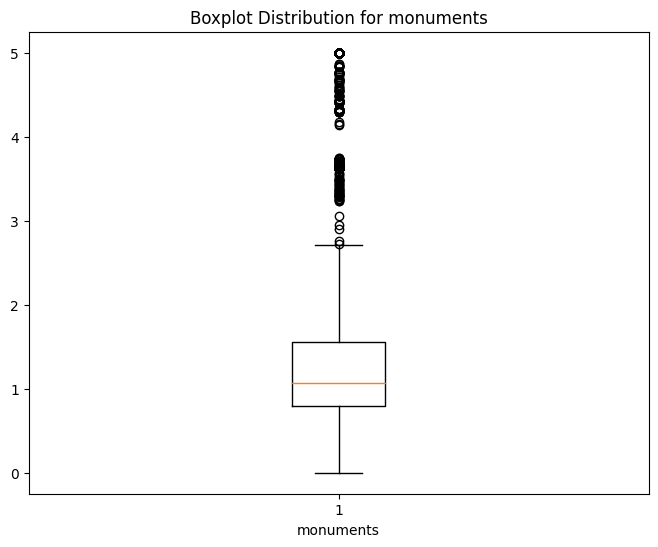

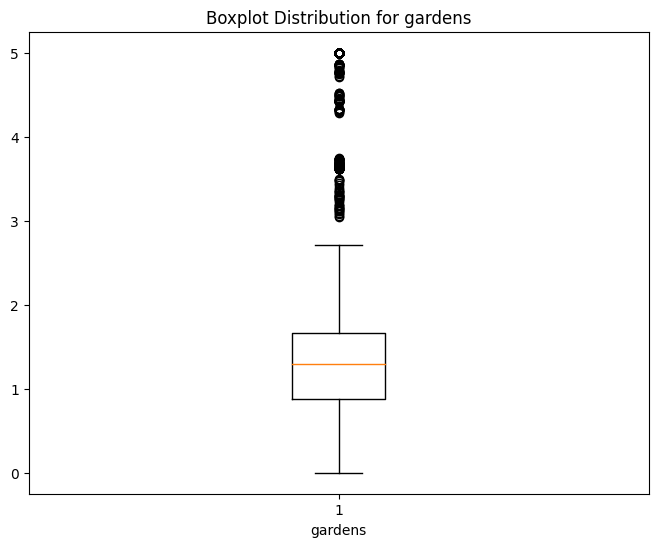

In [ ]:
# Review dataset based on clean data
# Create a box plot for each column
for column in cleaned_reviews:
    if cleaned_reviews[column].dtype in [int, float]:
        plt.figure(figsize=(8, 6))
        plt.boxplot(cleaned_reviews[column], vert=True)
        plt.title(f'Boxplot Distribution for {column}')
        plt.xlabel(f'{column}')
        plt.show()

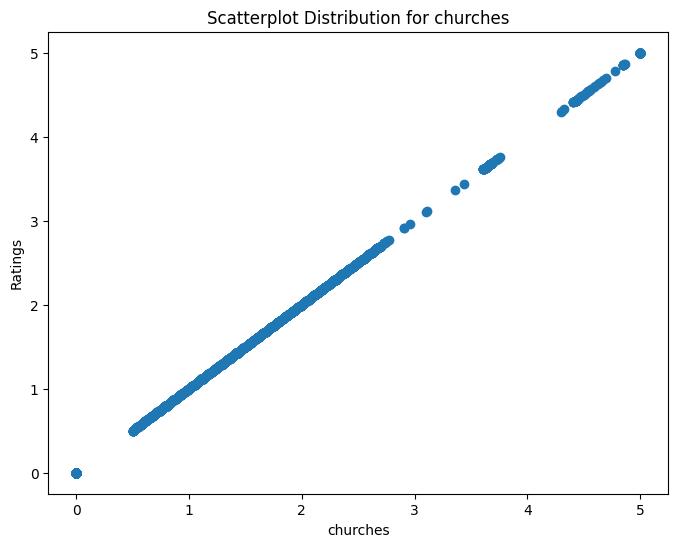

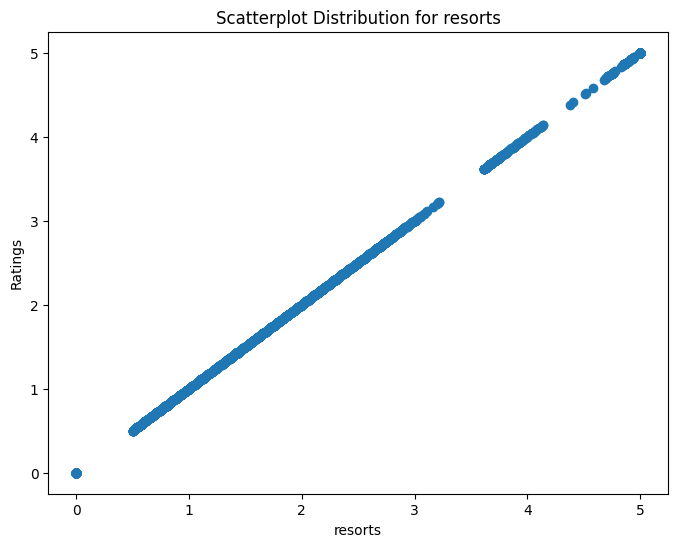

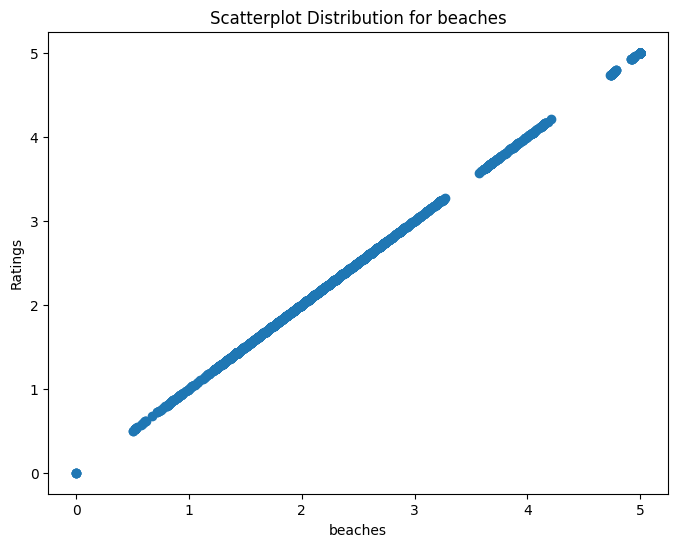

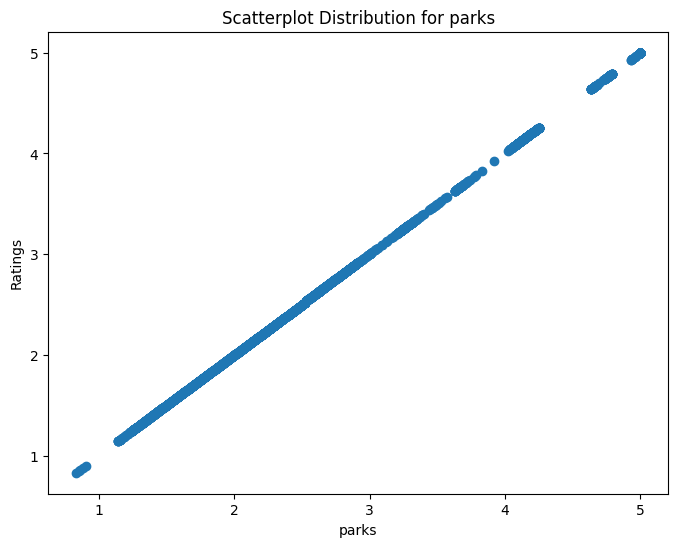

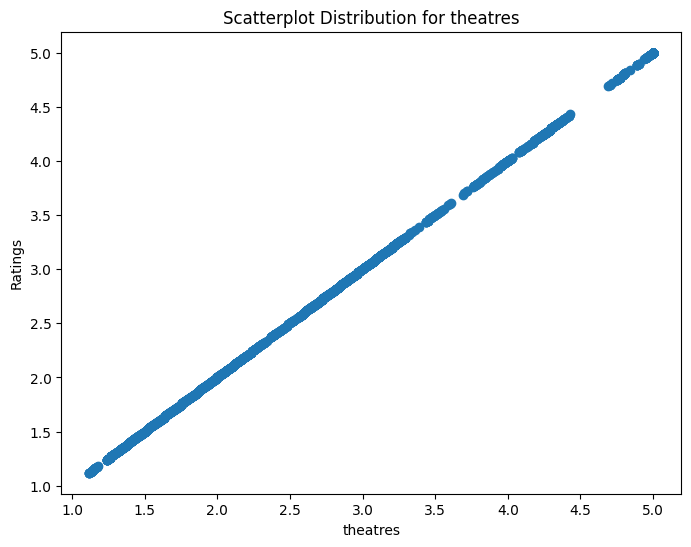

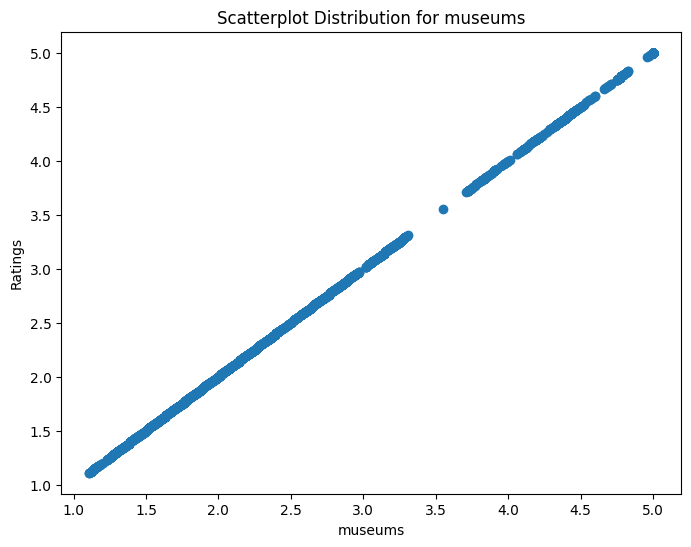

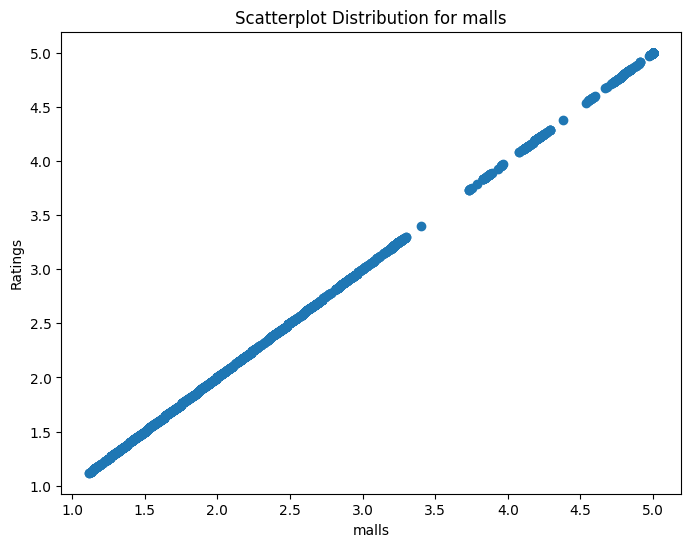

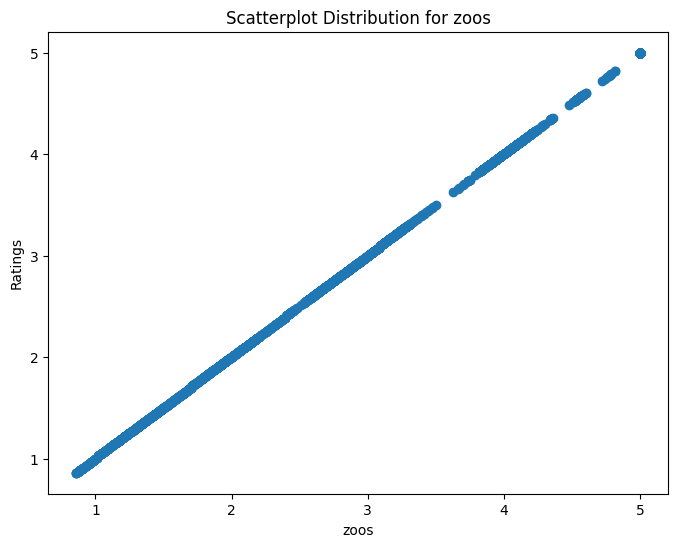

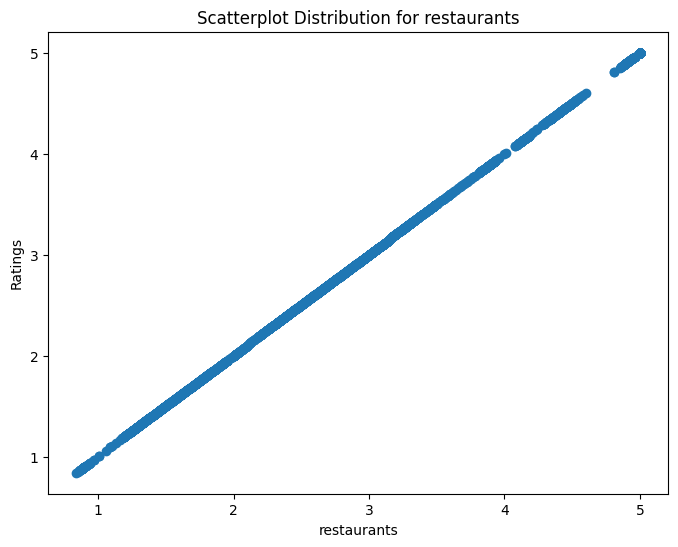

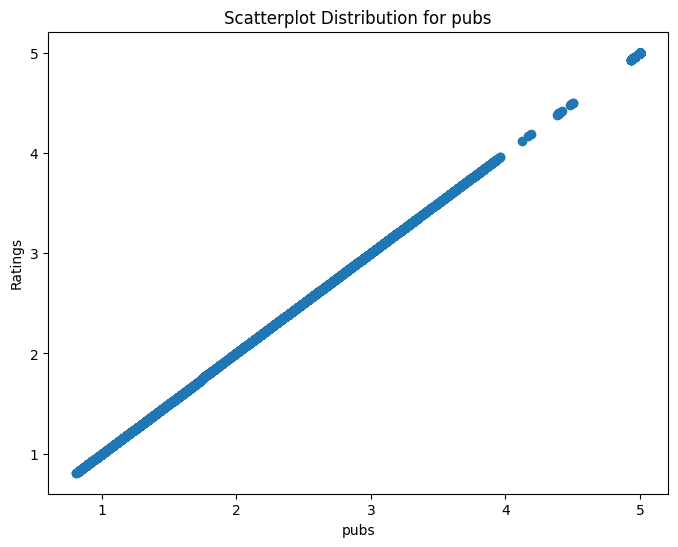

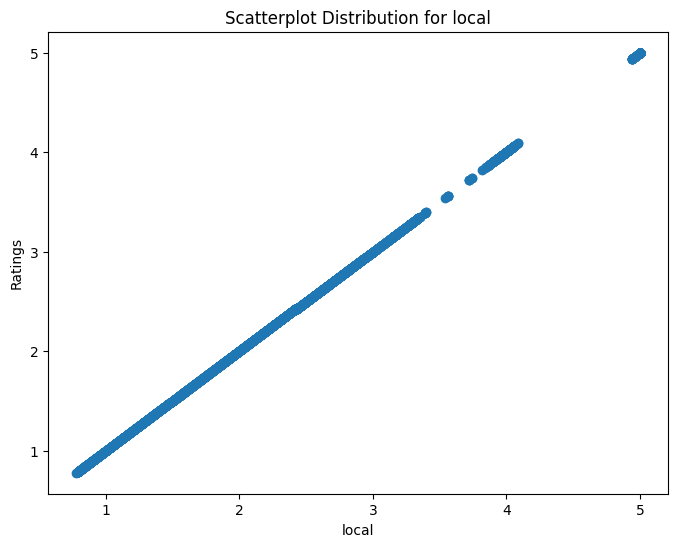

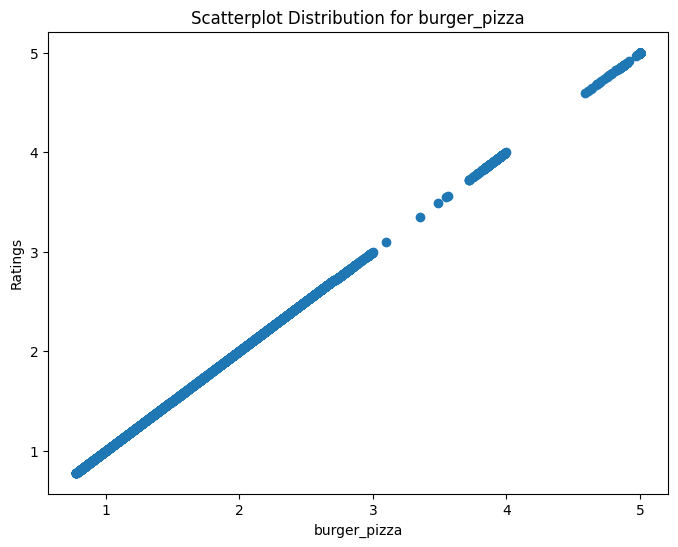

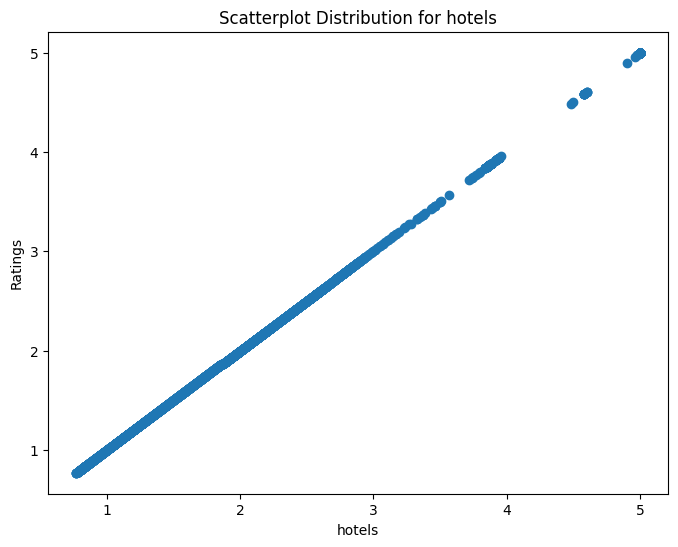

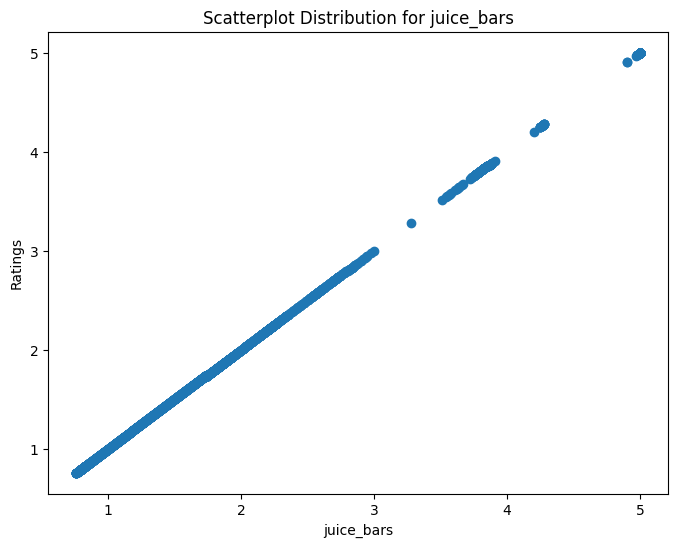

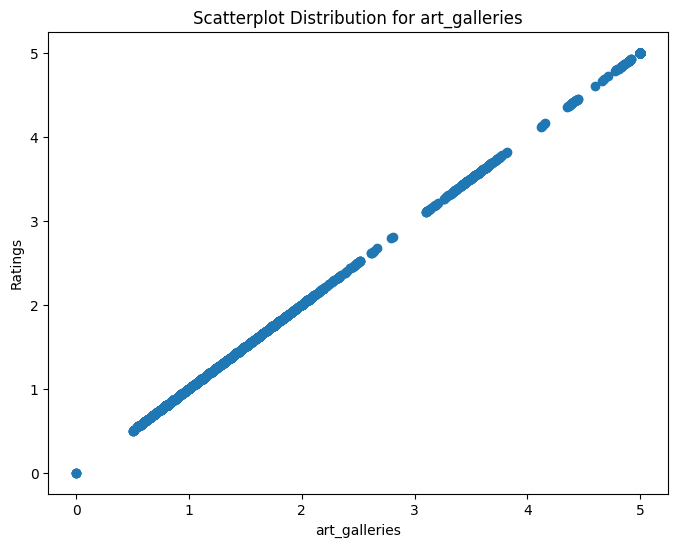

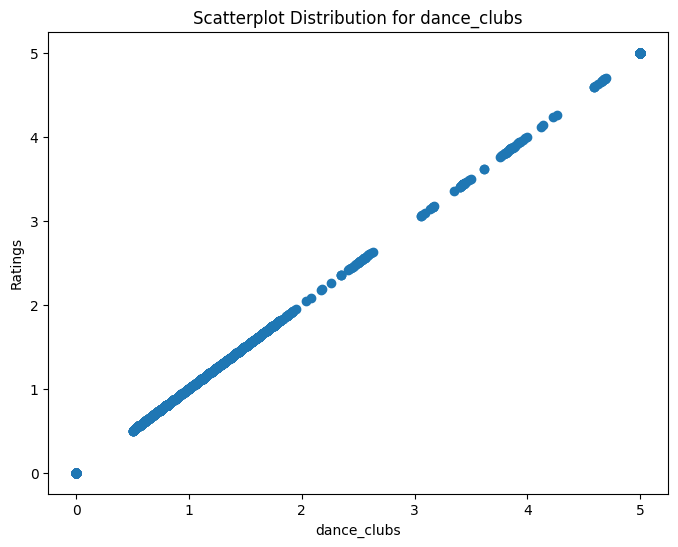

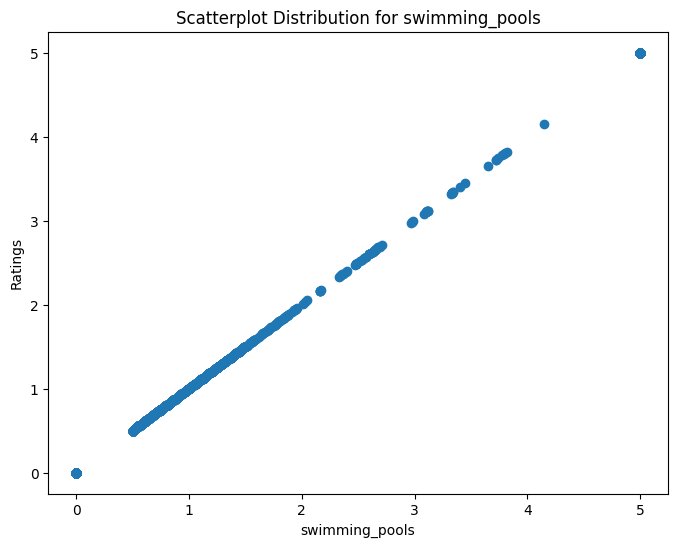

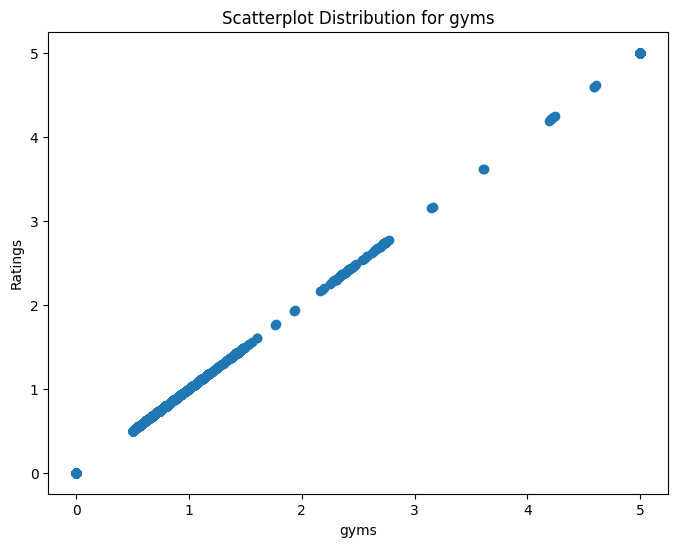

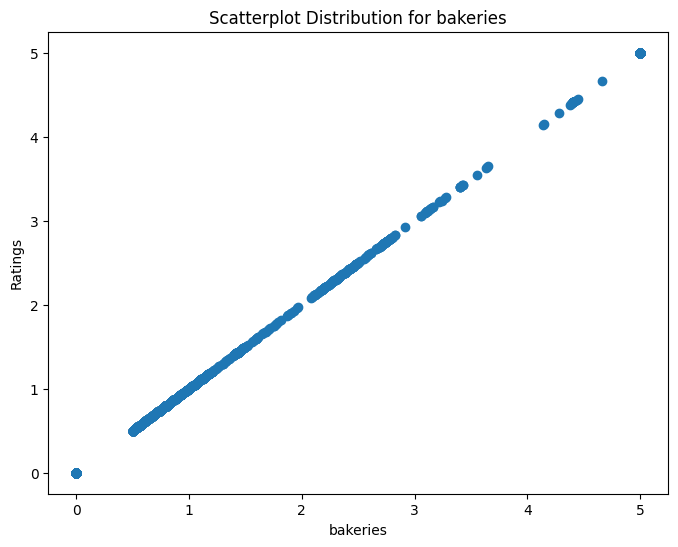

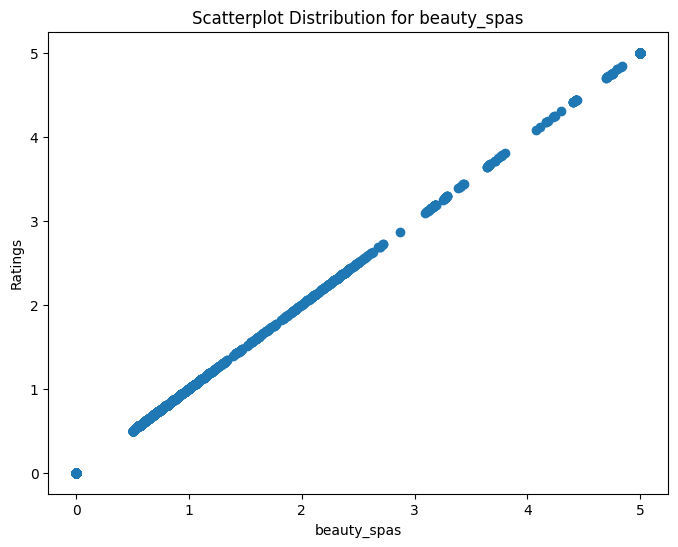

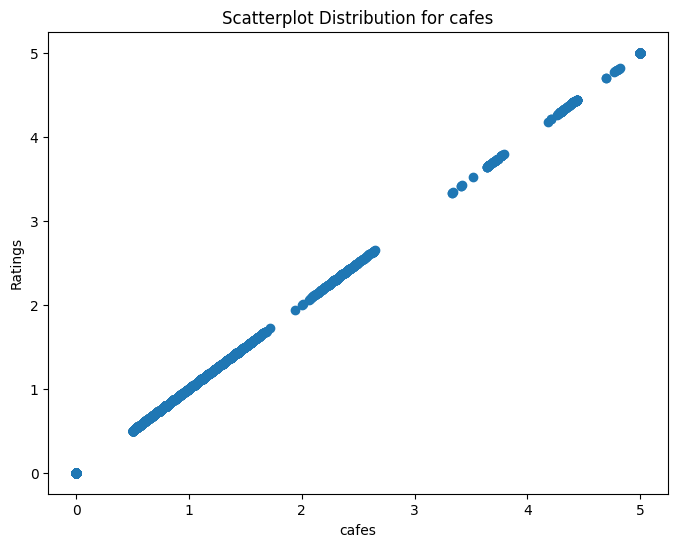

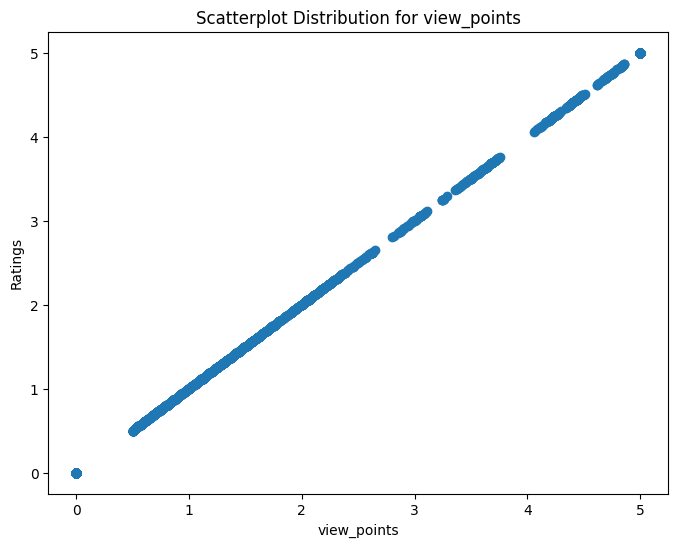

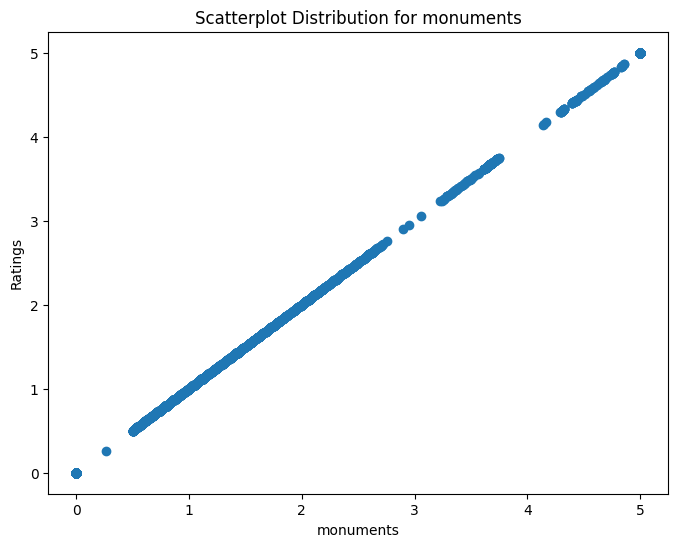

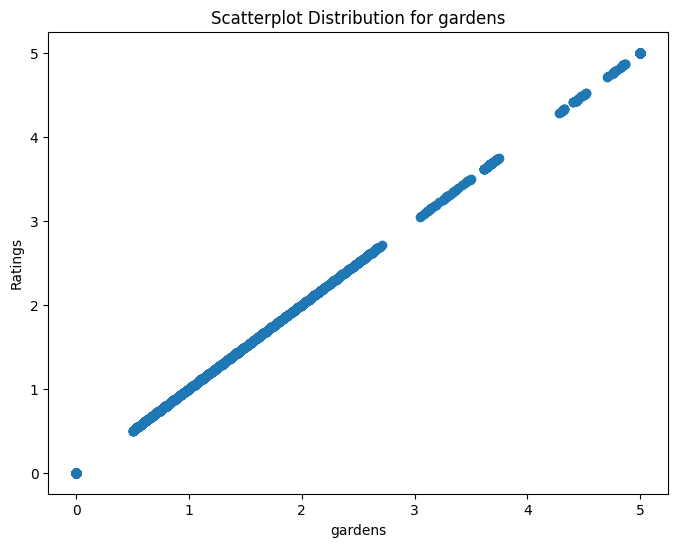

In [ ]:
# Using scatterplot to review for outliers
for column in cleaned_reviews:
    plt.figure(figsize=(8, 6))
    plt.scatter(cleaned_reviews[column], cleaned_reviews[column], marker='o')
    plt.title(f'Scatterplot Distribution for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Ratings')
    plt.show()

In [ ]:
# Review Average Ratings in each column
average_ratings = pd.DataFrame(cleaned_reviews.mean(), columns=['average_ratings'])
sorted = average_ratings.sort_values(by='average_ratings', ascending=False)
print(sorted)

                average_ratings
malls                  3.351778
restaurants            3.126301
theatres               2.959278
museums                2.893809
pubs                   2.833093
parks                  2.797192
local                  2.550071
zoos                   2.541047
beaches                2.489520
resorts                2.319824
art_galleries          2.206060
juice_bars             2.190346
hotels                 2.125747
burger_pizza           2.078339
view_points            1.749941
gardens                1.560570
monuments              1.530818
churches               1.455674
dance_clubs            1.192821
beauty_spas            0.999443
bakeries               0.969072
cafes                  0.965098
swimming_pools         0.949175
gyms                   0.822374


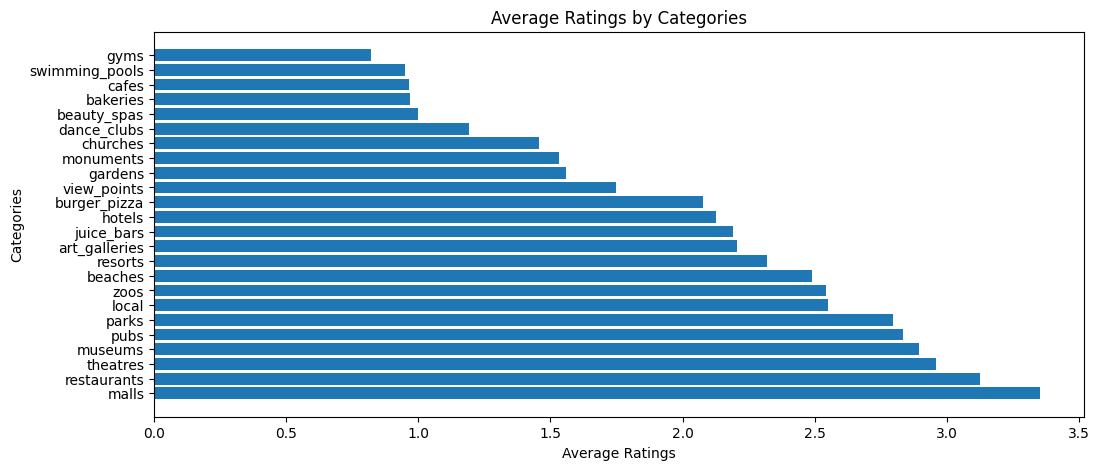

In [ ]:
# bar chart of average ratings using cleaned dataset
sorted = average_ratings.sort_values(by='average_ratings', ascending=False)
plt.figure(figsize=(12, 5))  # Set the size of the figure (width, height)
plt.barh(sorted.index, sorted['average_ratings'])  # Plot the bar graph horizontally
plt.xlabel('Average Ratings')
plt.ylabel('Categories')
plt.title('Average Ratings by Categories')
plt.show()

In [ ]:
# retrieve users column from old dataset
user_column = removed['user']
# add users column into cleaned dataset
cleaned_reviews['user'] = user_column

# Move 'user' to first column
cols = cleaned_reviews.columns.tolist()  # list of column names
cols.insert(0, cols.pop(cols.index('user')))  # Move 'user' to first column
cleaned_dataset = cleaned_reviews[cols]

<ipython-input-18-6df7eb943079>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_reviews['user'] = user_column


In [ ]:
# Transfer cleaned dataset to csv file
cleaned_dataset.to_csv('cleaned_dataset.csv', index=False)

# Download the file to your computer
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>